In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm

In [2]:
raw_data = pd.read_csv('../dataset/pulsar_star.csv')

In [3]:
raw_data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [4]:
raw_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
raw_data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [6]:
raw_data.shape

(17898, 9)

In [7]:
raw_data.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

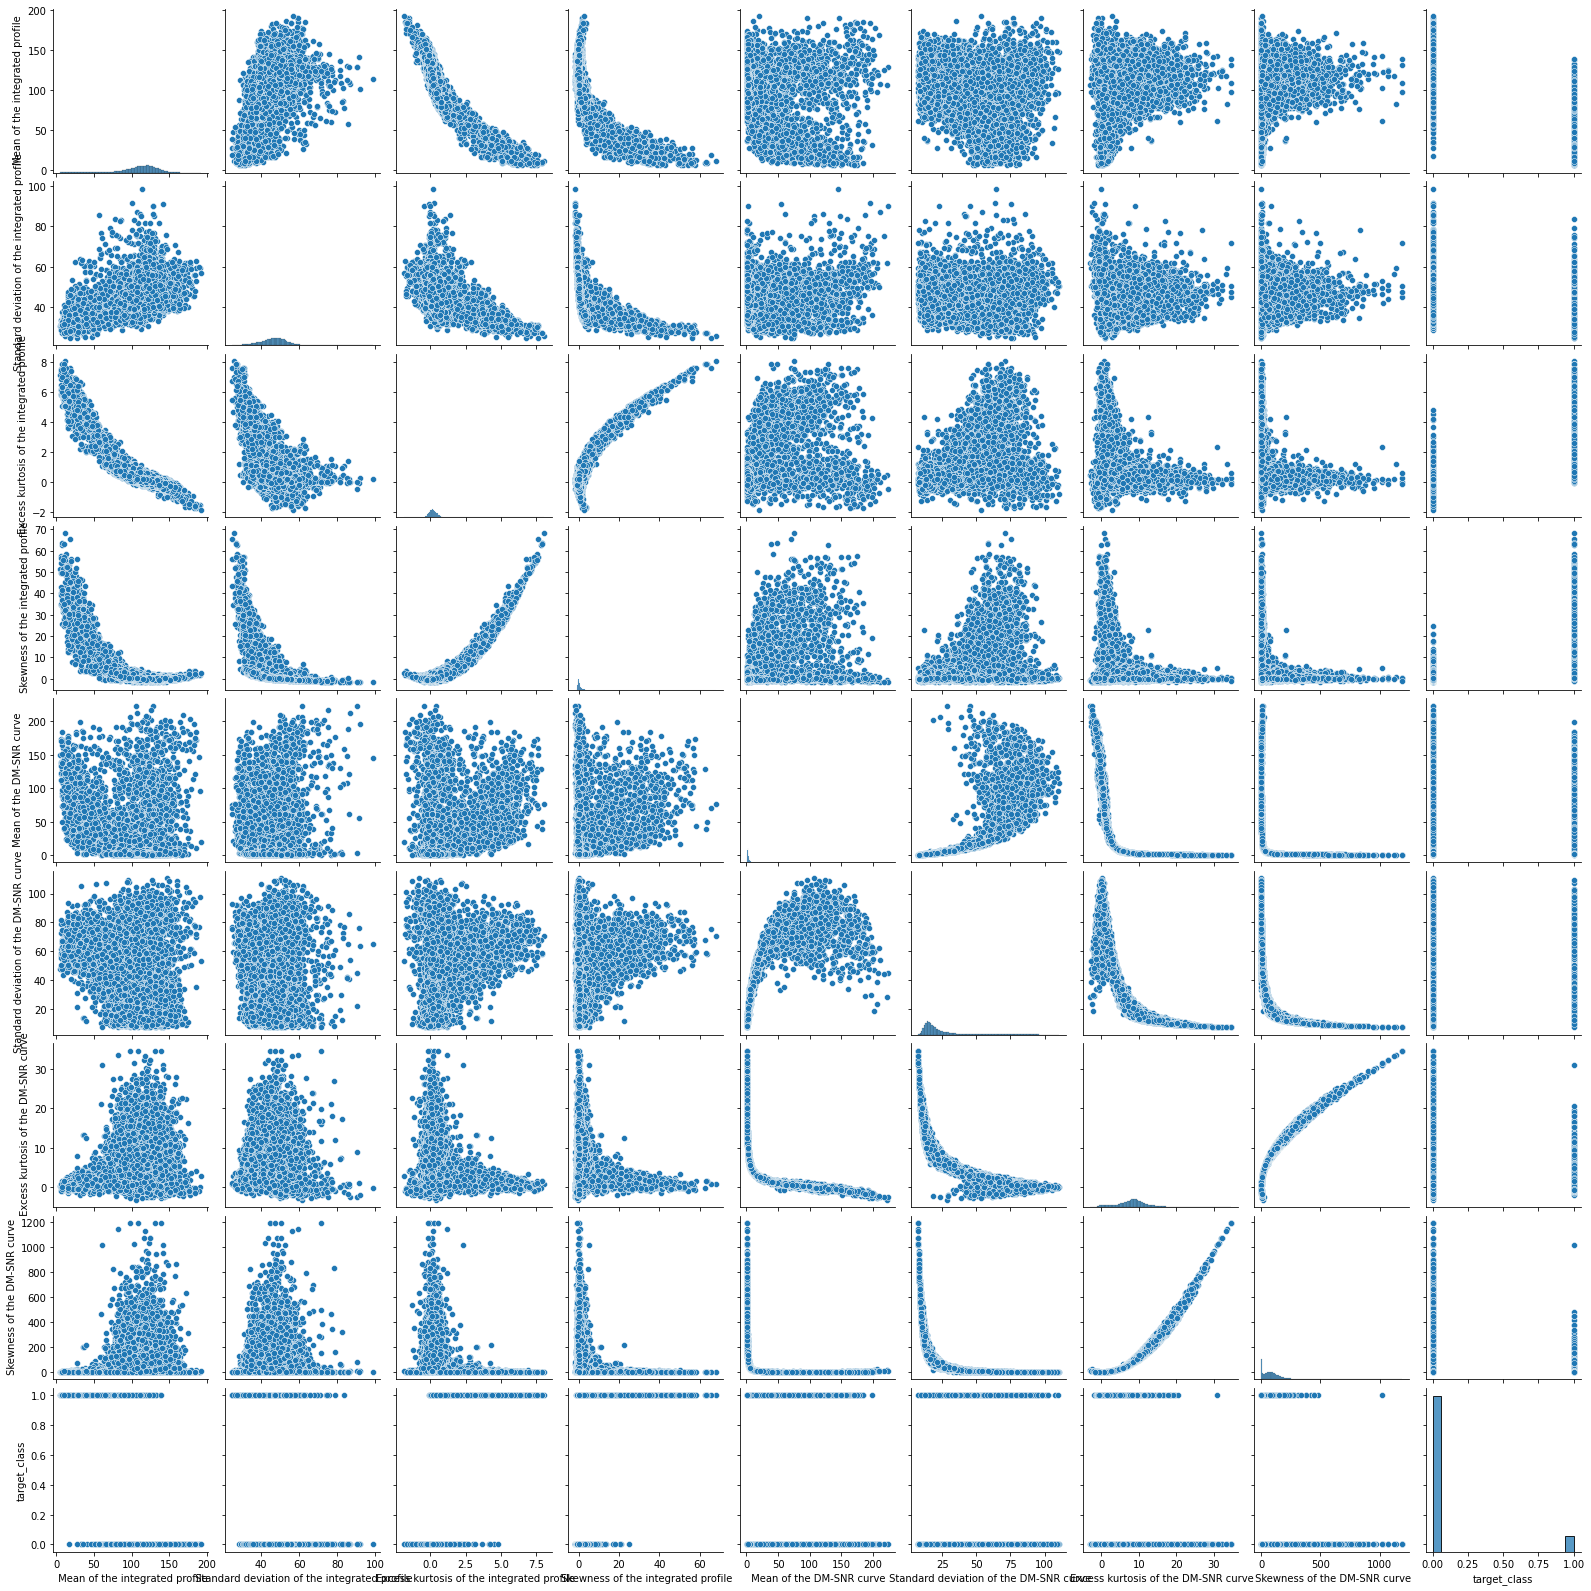

In [8]:
sns.pairplot(raw_data)
plt.show()

In [9]:
df = raw_data.copy()

In [10]:
x = df.drop('target_class', axis=1)
y = df['target_class']

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

f_model = ExtraTreesClassifier()
f_model.fit(x, y)

ExtraTreesClassifier()

In [12]:
f_model.feature_importances_

array([0.17501398, 0.05839548, 0.28615303, 0.19205616, 0.06180819,
       0.12218172, 0.0595191 , 0.04487234])

In [13]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [14]:
scaled_x = StandardScaler().fit_transform(x)
scaled_x

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

In [15]:
model = svm.SVC()
k_folds = KFold(n_splits = 10)
scores = cross_val_score(model, x, y, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96927374 0.95083799 0.95083799 0.97765363 0.96536313 0.97821229
 0.96648045 0.98268156 0.99049748 0.98937954]
Average CV Score:  0.9721217808394567
Number of CV Scores used in Average:  10


In [16]:
model = svm.SVC()
k_folds = KFold(n_splits = 10)
scores = cross_val_score(model, scaled_x, y, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.97709497 0.9603352  0.96536313 0.98379888 0.9698324  0.98268156
 0.97374302 0.98547486 0.99273337 0.98770263]
Average CV Score:  0.9778760020110482
Number of CV Scores used in Average:  10


In [17]:
x = df.drop('target_class', axis=1)
y = df['target_class']

In [18]:
for train_index, test_index in k_folds.split(scaled_x):
    x_train, x_test = scaled_x[train_index], scaled_x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [19]:
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

16109 1789
16109 1789


In [20]:
sv_model = svm.SVC()
sv_model.fit(x_train, y_train)

SVC()

In [21]:
print(sv_model.score(x_train, y_train))
print(sv_model.score(x_test, y_test))
y_pred = sv_model.predict(x_test)

0.9787075547830405
0.9877026271660145


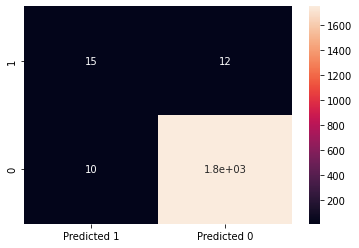

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[1,0], columns=['Predicted 1', 'Predicted 0'])
sns.heatmap(df_cm, annot=True)
plt.show()

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1762
           1       0.60      0.56      0.58        27

    accuracy                           0.99      1789
   macro avg       0.80      0.77      0.79      1789
weighted avg       0.99      0.99      0.99      1789



In [24]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [25]:
from sklearn.utils import resample

class_0 = df[df['target_class'] == 0]
class_1 = df[df['target_class'] == 1]

df_upsample = resample(
    class_1, 
    replace=True,
    n_samples=len(class_0) - 1639,
    random_state=32
)

In [26]:
df_upsample = df_upsample.reset_index(drop=True)

df = pd.concat([df, df_upsample], axis=0)
df['target_class'].value_counts()

0    16259
1    16259
Name: target_class, dtype: int64

In [27]:
print(len(x_train)/len(df) * 100)
print(len(x_test)/len(df) * 100)

49.5387170182668
5.501568362137893


In [28]:
x = df.drop('target_class', axis=1)
y = df['target_class'].values

In [29]:
scaled_x = StandardScaler().fit_transform(x)

In [36]:
k_folds = KFold(n_splits = 10)
x_train = []
x_test = []
y_train = []
y_test = []
for train_index, test_index in k_folds.split(scaled_x):
    for i in train_index:
        x_train.append(scaled_x[i])
        y_train.append(y[i])
    for j in test_index:
        x_test.append(scaled_x[j])
        y_test.append(y[j])
#     x_train, x_test = scaled_x[train_index], scaled_x[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [31]:
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

292662 32518
292662 32518


In [32]:
sv_model = svm.SVC()
sv_model.fit(x_train, y_train)

SVC()

In [33]:
print(sv_model.score(x_train, y_train))
print(sv_model.score(x_test, y_test))
y_pred = sv_model.predict(x_test)

0.9492588720093487
0.9492588720093487


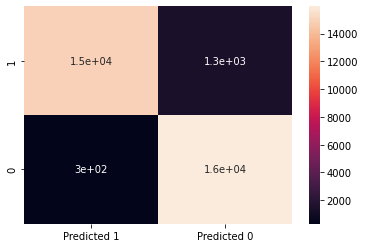

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[1,0], columns=['Predicted 1', 'Predicted 0'])
sns.heatmap(df_cm, annot=True)
plt.show()

In [35]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     16259
           1       0.98      0.92      0.95     16259

    accuracy                           0.95     32518
   macro avg       0.95      0.95      0.95     32518
weighted avg       0.95      0.95      0.95     32518

